# Apply PCM to argo reference data base

First try

In [1]:
import xarray as xr
import numpy as np

import pyxpcm
from pyxpcm.models import pcm

import Plotter
from Plotter import Plotter

import subprocess

from BIC_calculation import *

import scipy as sp
from scipy.io import loadmat

## 1. Load argo reference database

load from .mat as dict

In [2]:
ref_path = '/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology/argo_profiles/'
mat_dict = sp.io.loadmat(ref_path + 'argo_3000.mat')
#mat_dict

convert from dict to xarray

In [3]:
ds = xr.Dataset(
     data_vars=dict(
         pres=(["n_pres", "n_profiles"], mat_dict['pres']),
         temp=(["n_pres", "n_profiles"], mat_dict['temp']),
         ptmp=(["n_pres", "n_profiles"], mat_dict['ptmp']),
         sal=(["n_pres", "n_profiles"], mat_dict['sal']),
         source=(["n_profiles"], np.squeeze(mat_dict['source'])),
     ),
     coords=dict(
         long=(["n_profiles"], np.squeeze(mat_dict['long'])),
         lat=(["n_profiles"], np.squeeze(mat_dict['lat'])),
         dates=(["n_profiles"], np.squeeze(mat_dict['dates'])),
     ),
     attrs=dict(
         __header__=mat_dict['__header__'],
         __version__=mat_dict['__version__'],
         __globals__=mat_dict['__version__'],
     )
 )

In [4]:
ds

<xarray.Dataset>
Dimensions:  (n_pres: 1024, n_profiles: 1636)
Coordinates:
    long     (n_profiles) float64 4.342 4.973 5.163 5.067 ... 4.029 4.016 3.943
    lat      (n_profiles) float64 -4.322 -4.778 -5.086 ... -9.722 -9.764 -9.904
    dates    (n_profiles) float64 2.007e+13 2.007e+13 ... 2.017e+13 2.018e+13
Dimensions without coordinates: n_pres, n_profiles
Data variables:
    pres     (n_pres, n_profiles) float64 5.0 5.0 5.0 5.0 ... nan nan nan nan
    temp     (n_pres, n_profiles) float64 28.69 28.87 28.88 ... nan nan nan
    ptmp     (n_pres, n_profiles) float64 28.69 28.87 28.88 29.2 ... nan nan nan
    sal      (n_pres, n_profiles) float64 35.03 33.84 34.14 ... nan nan nan
    source   (n_profiles) object ['1900754_007.BRECKOWENS'] ... ['6902629_080.BirgitKLEIN']
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue N...
    __version__:  1.0
    __globals__:  1.0

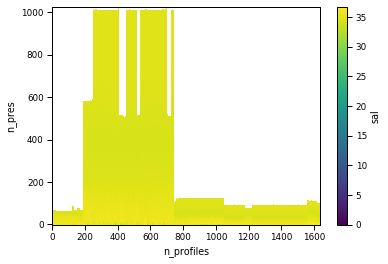

In [6]:
ds['sal'].plot();

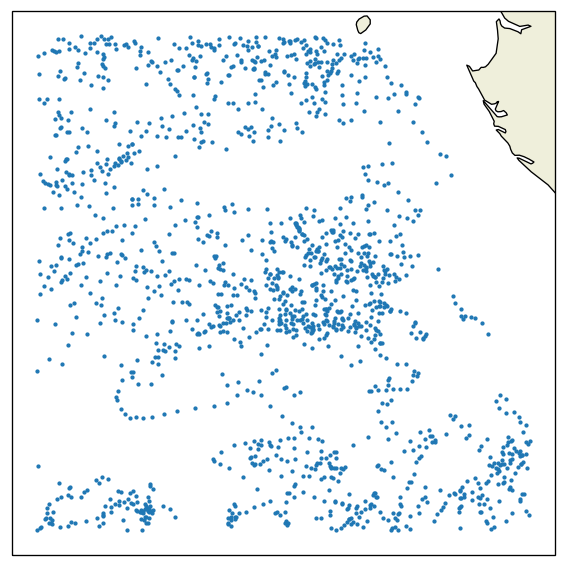

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

proj=ccrs.PlateCarree()
subplot_kw = {'projection': proj}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(
            6, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

sc = ax.scatter(ds['long'], ds['lat'], s=3, transform=proj)

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax.add_feature(land_feature, edgecolor='black')

In [ ]:
# geographical extent
geo_extent = [-5, 42, 30, 46] # [min lon, max lon, min lat, max lat]
# time extent
time_extent = ["2018-01-01", "2018-12-31"] # ["min date", "max date"]
# variable to be predict
var_name_ds = 'thetao' # name in dataset
# file name
file_name = 'global-reanalysis-phy-001-030-monthly_med_2018.nc'

## 2. Apply PCM

## 3. Plots